<h2 style = "text-align: center; font-size: 40px;">Predictive_maintenance<h2>

<h2>Introduction</h2>

<p>La maintenance prédictive est une stratégie proactive qui utilise des données en temps réel et des analyses avancées pour prédire les défaillances d'équipements avant qu'elles ne surviennent. En surveillant les paramètres de fonctionnement, elle permet d'anticiper les pannes, réduisant ainsi les temps d'arrêt non planifiés et les coûts de maintenance. Cette approche optimise la disponibilité des équipements, prolonge leur durée de vie utile et améliore la sécurité des opérations. En collectant des données à partir de capteurs et en utilisant des modèles prédictifs, elle permet une planification efficace des interventions de maintenance préventive. Globalement, la maintenance prédictive offre une meilleure gestion des ressources, des économies de coûts et une augmentation de la productivité des entreprises.</p>

<h2>Objectifs</h2>

<p>L'objectif est de traiter un ensemble de données de maintenance prédictive afin de le rendre utilisable pour développer différents modèles de machine learning de classification des produits en défaillance ou non. Cela implique l'utilisation de multiples caractéristiques répertoriées dans l'ensemble de données pour prédire avec précision si un produit subira une défaillance ou non</p>

<h2>Index de la page</h2>
<ol>
    <li>Collecte de données</li>
    <li>Traitement des données</li>
    <li>Visualisation des données</li>
    <li>Initialisation du modèle</li>
    <li>Évaluation et optimisation du module de prédiction</li>
</ol>

<h1>1.Collecte de données</h1>

<h3>Source</h3>

Les données ont été collectées à partir du célèbre site web <b>Kaggle</b> qui contient de nombreux ensembles de données et informations utiles.<br>
Lien : <a href="https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification">predictive-maintenance-classification</a>

<h2>Importer les bibliothèque & dataset</h2>

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
dataset = "predictive_maintenance.csv"
data = pd.read_csv(dataset)
data.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure


In [69]:
data.shape

(10000, 10)

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [71]:
data['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

In [72]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [73]:
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


<h3 style="text-align: center; color: #333;">Description de l'ensemble de données sur la maintenance prédictive</h3>
</ol>
<ul>
    <li><span style="font-weight: bold; color: #555;">Product ID</span>: C'est un identifiant unique attribué à chaque produit dans l ensemble de données.</li>
    <li><span style="font-weight: bold; color: #555;">Type</span>: Indique la catégorie à laquelle chaque produit appartient, classée en faible (L), moyen (M) ou élevé (H).</li>
    <li><span style="font-weight: bold; color: #555;">Air temperature [K]</span>: Cela représente la température de l'air en Kelvin.</li>
    <li><span style="font-weight: bold; color: #555;">Process temperature [K]</span>: Il s agit de la température du processus en Kelvin.</li>
    <li><span style="font-weight: bold; color: #555;">Rotational speed [rpm]</span>: C'est la vitesse de rotation de la machine, mesurée en tours par minute (RPM).</li>
    <li><span style="font-weight: bold; color: #555;">Torque [Nm]</span>: Le couple représente la force de rotation appliquée par la machine, mesurée en Newton-mètres (Nm).</li>
    <li><span style="font-weight: bold; color: #555;">Tool wear [min]</span>: Il s'agit du temps d'utilisation de l'outil, mesuré en minutes.</li>
    <li><span style="font-weight: bold; color: #555;">Target</span>: Indique si une défaillance s est produite ou non.</li>
    <li><span style="font-weight: bold; color: #555;">Failure Type</span>: Si une défaillance s'est produite, cette colonne indique le type de défaillance.</li>
</ul>

<h1>2.Traitement des données</h1>

<h2>Vérifier les valeur manquants</h2>

In [74]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [75]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

<h2>Vérifier les doublons</h2>

In [76]:
data.duplicated().sum().any()

False

In [77]:
data['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

<h2>Encoder les variables catégorique</h2>

In [78]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
data['Product ID'] = ordinal_encoder.fit_transform(data[['Product ID']])
data['Type'] = ordinal_encoder.fit_transform(data[['Type']])
data['Failure Type'] = ordinal_encoder.fit_transform(data[['Failure Type']])
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,7003.0,2.0,298.1,308.6,1551,42.8,0,0,1.0
1,2,1003.0,1.0,298.2,308.7,1408,46.3,3,0,1.0
2,3,1004.0,1.0,298.1,308.5,1498,49.4,5,0,1.0
3,4,1005.0,1.0,298.2,308.6,1433,39.5,7,0,1.0
4,5,1006.0,1.0,298.2,308.7,1408,40.0,9,0,1.0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997.0,2.0,298.8,308.4,1604,29.5,14,0,1.0
9996,9997,1001.0,0.0,298.9,308.4,1632,31.8,17,0,1.0
9997,9998,9998.0,2.0,299.0,308.6,1645,33.4,22,0,1.0
9998,9999,1002.0,0.0,299.0,308.7,1408,48.5,25,0,1.0


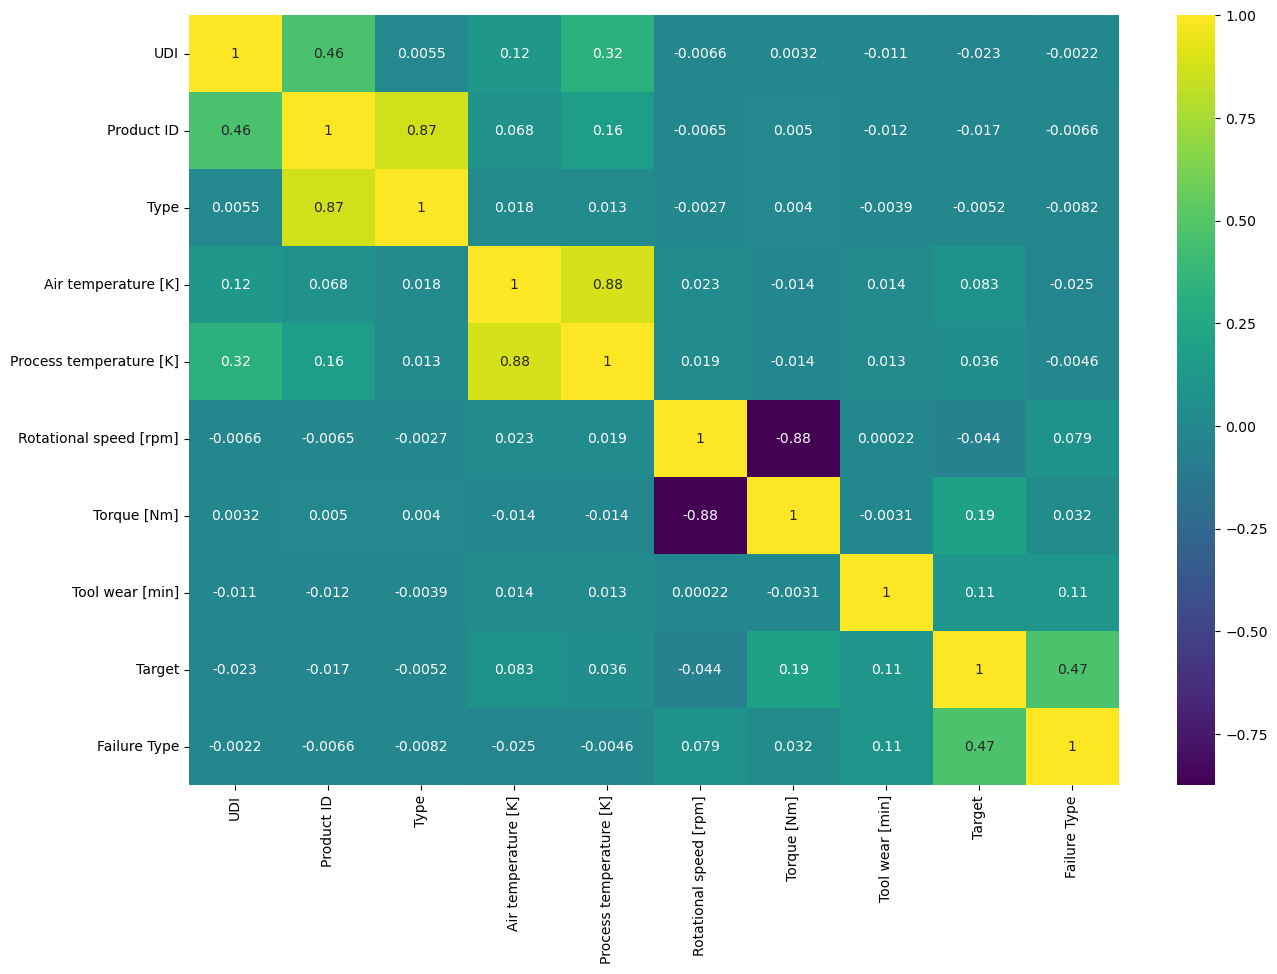

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot = True,cmap = "viridis")
plt.draw()

In [80]:
data_selected=data.drop(['Product ID',"UDI","Failure Type","Type"], axis=1)

In [47]:
data_selected.head(10)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
5,298.1,308.6,1425,41.9,11,0
6,298.1,308.6,1558,42.4,14,0
7,298.1,308.6,1527,40.2,16,0
8,298.3,308.7,1667,28.6,18,0
9,298.5,309.0,1741,28.0,21,0


<h1>3.Visualisation des données</h1>

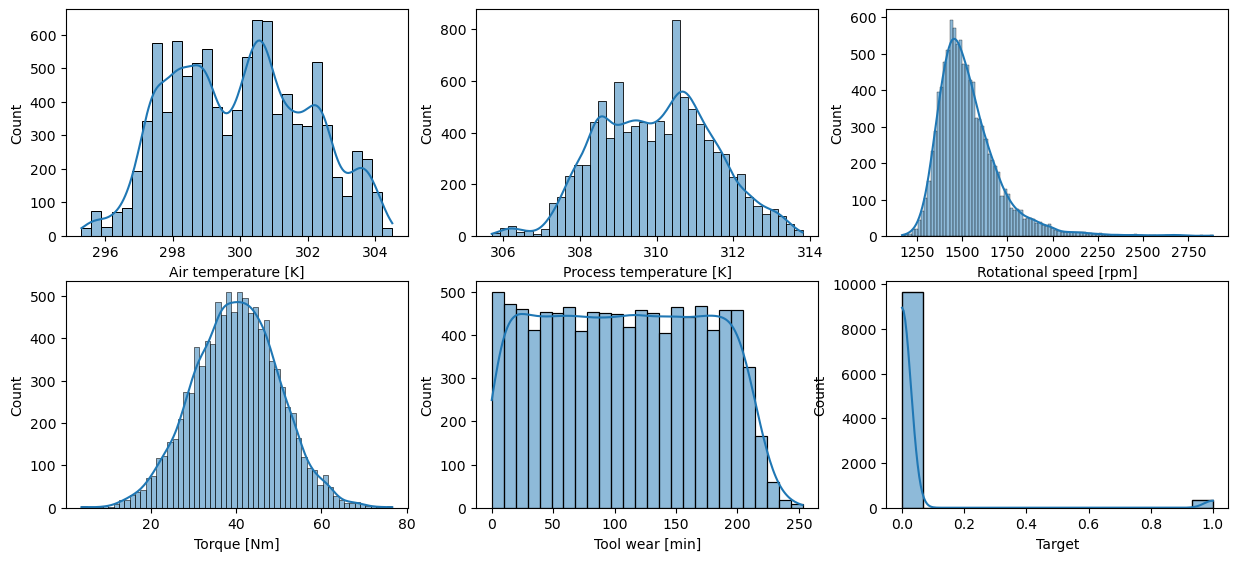

In [81]:
plt.figure(figsize=(15,10))
for i,col in enumerate(data_selected.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(data_selected[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

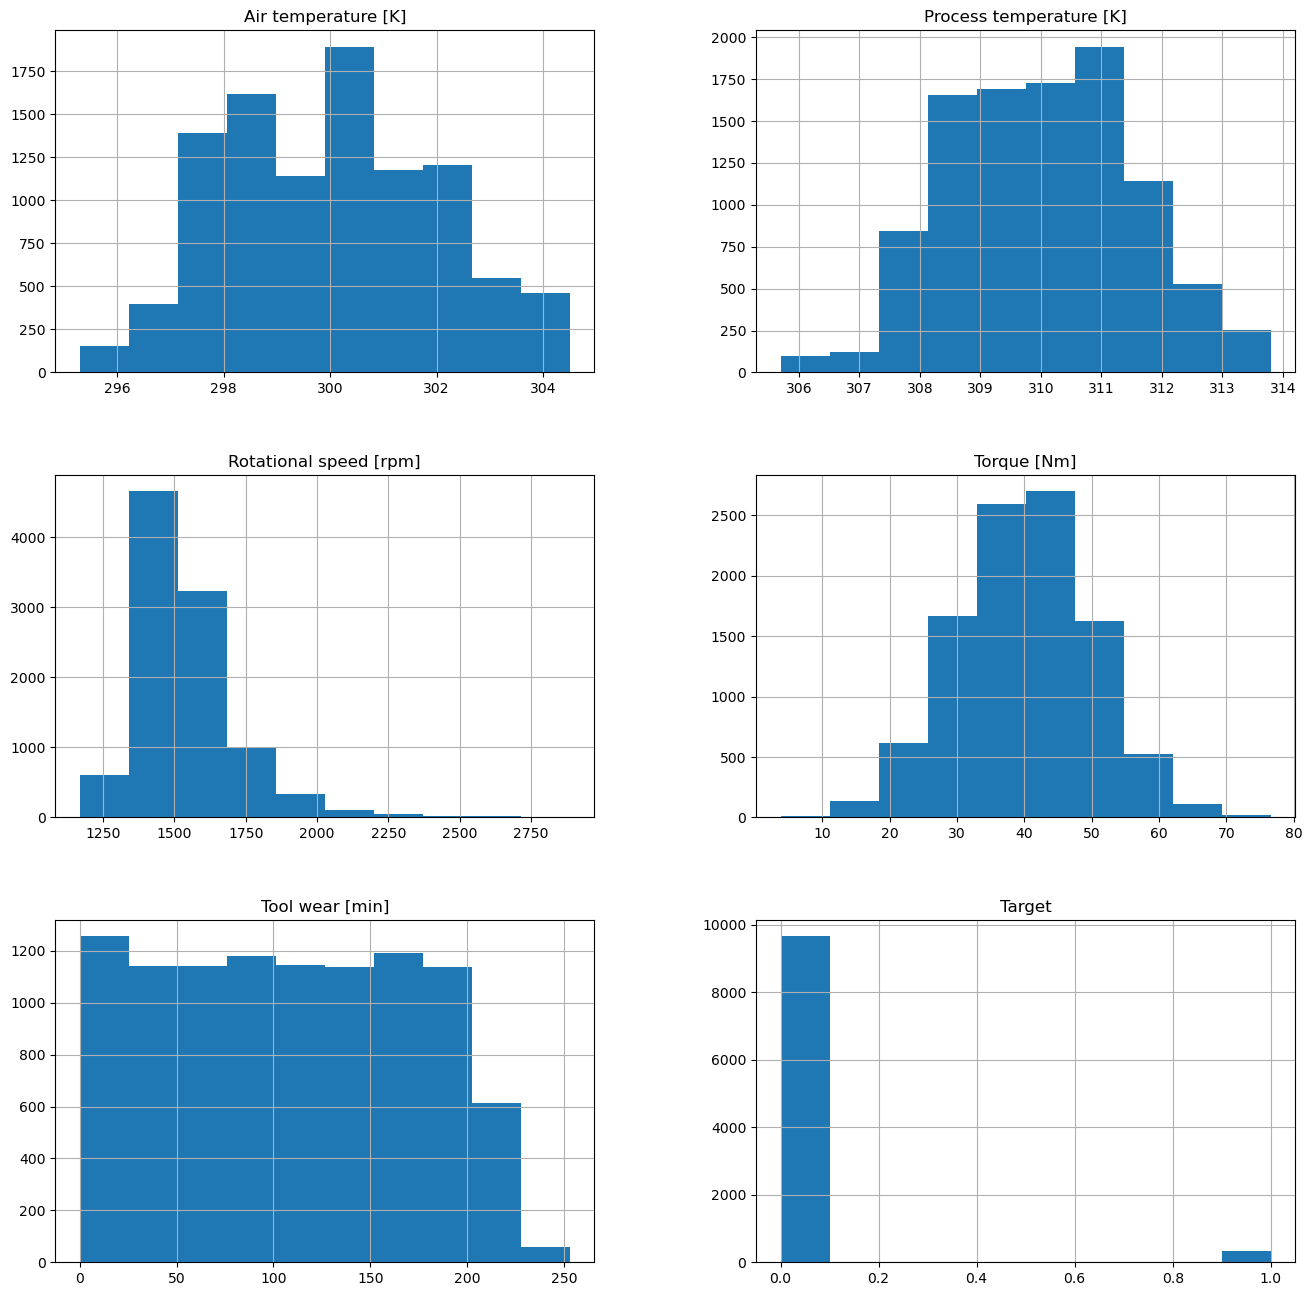

In [49]:
data_selected.hist(figsize=(16, 16))

In [82]:
data_selected.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


C:\Users\micro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


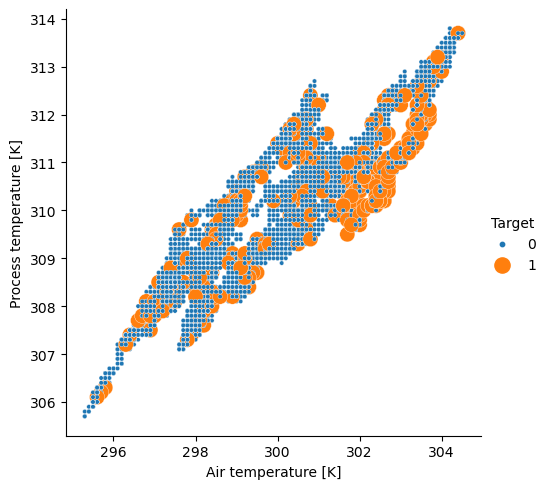

In [83]:
a = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Target",size="Target", sizes=(120, 10),data=data_selected)

C:\Users\micro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


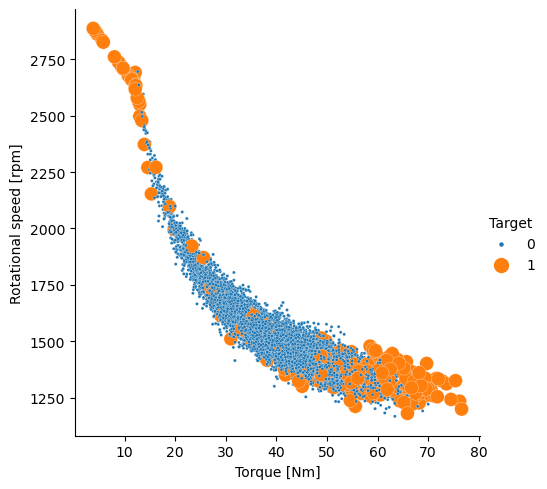

In [84]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",size="Target", sizes=(100, 5),data=data_selected)

In [85]:
data_selected

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


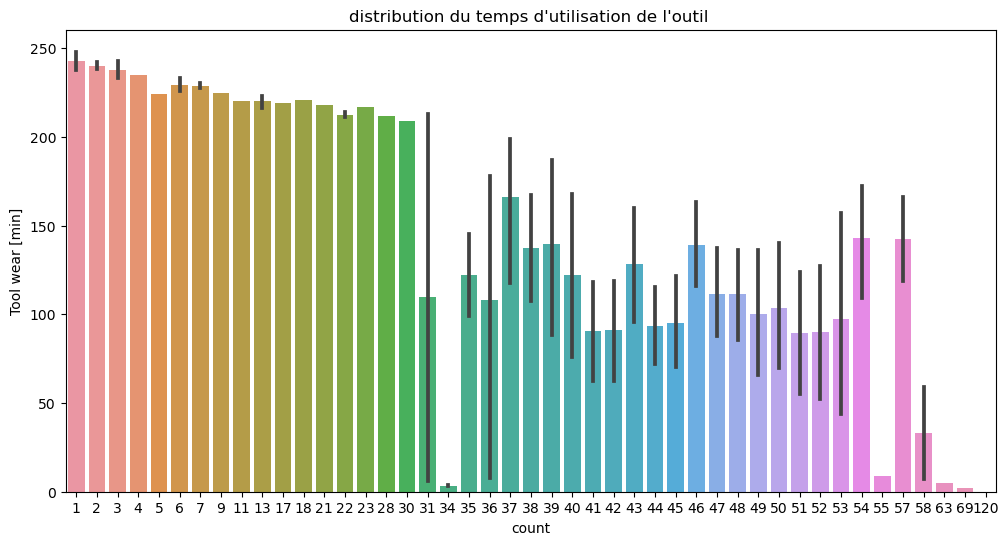

In [86]:
plt.figure(figsize = (12,6) )

target_genre = data_selected['Tool wear [min]'].value_counts()
barplot = sns.barplot(x = target_genre, y = target_genre.index)

plt.title("distribution du temps d'utilisation de l'outil ")
plt.show()

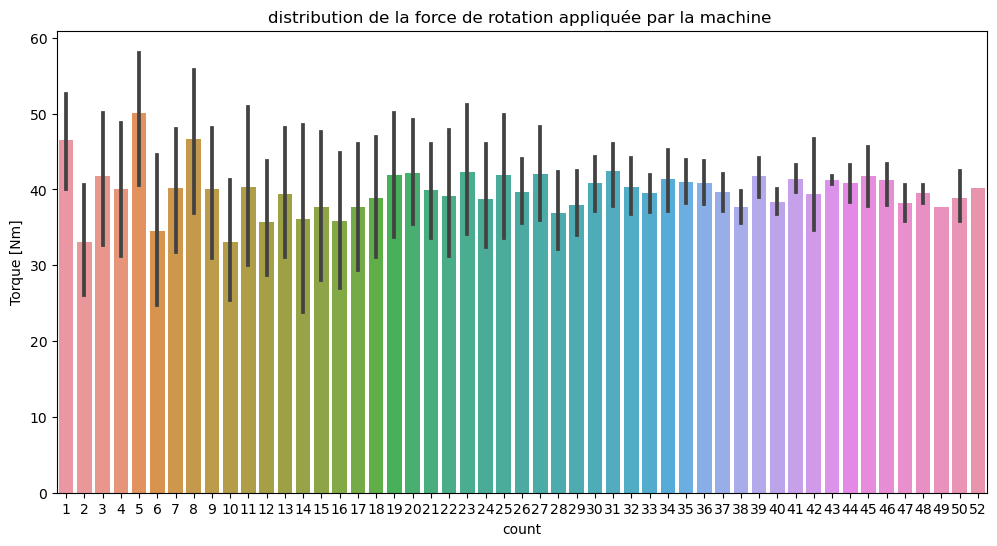

In [87]:
plt.figure(figsize = (12,6) )

target_genre = data_selected['Torque [Nm]'].value_counts()
barplot = sns.barplot(x = target_genre, y = target_genre.index)

plt.title("distribution de la force de rotation appliquée par la machine ")
plt.show()

In [88]:
speed_target = data_selected[['Air temperature [K]', 'Target']]
avg_speed_by_target = speed_target.groupby('Target')['Air temperature [K]'].mean()
avg_speed_by_target = pd.DataFrame(avg_speed_by_target)
print(avg_speed_by_target)

        Air temperature [K]
Target                     
0                299.973999
1                300.886431


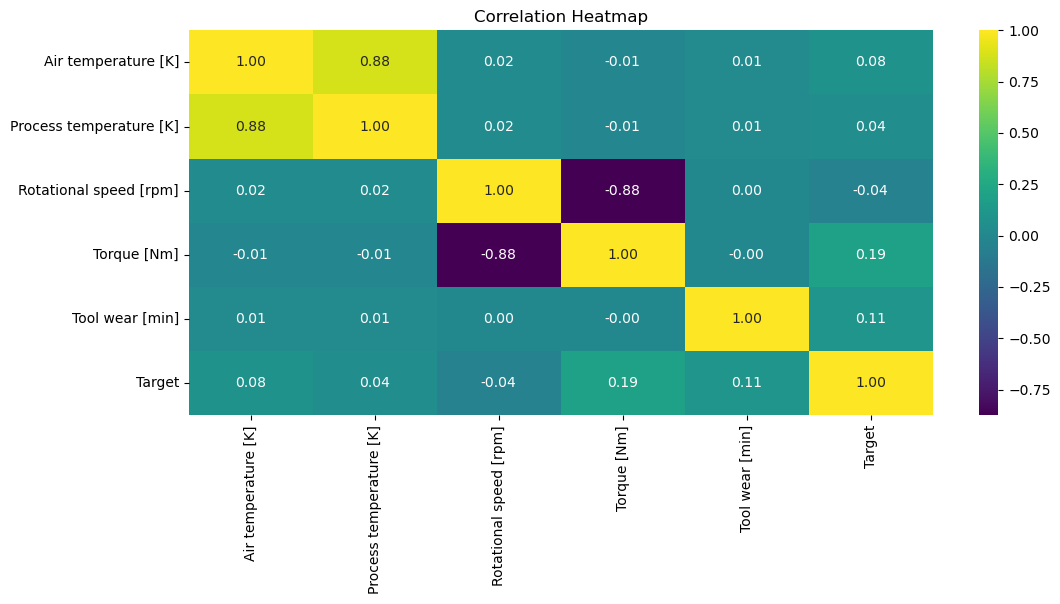

In [89]:
correlation_matrix = data_selected.corr()
plt.figure(figsize=(12, 5))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
heatmap.set_title('Correlation Heatmap')
plt.show()

C:\Users\micro\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


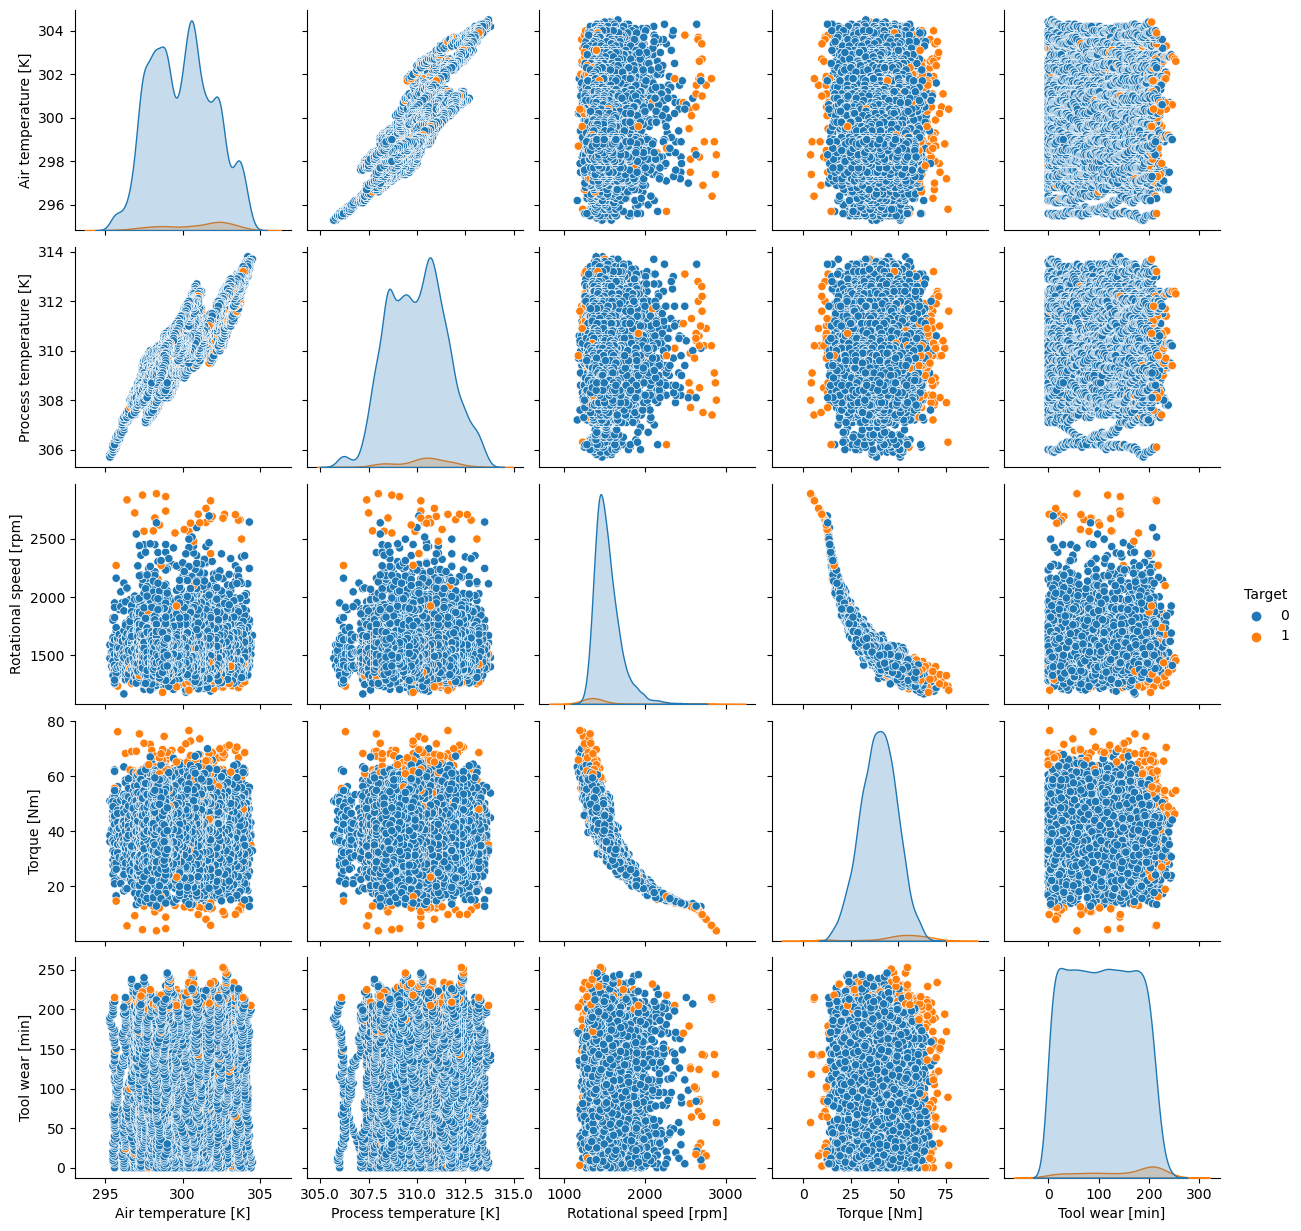

In [90]:
relationship_matrix = sns.pairplot(data_selected, hue='Target', corner=False, kind='scatter')

<h1>3.Initialisation du modèle</h1>

In [91]:
#séparer le variable cible et les variables d'entraînement
X = data_selected.drop(columns=['Target'])  
y = data_selected["Target"]  
X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9
...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14
9996,298.9,308.4,1632,31.8,17
9997,299.0,308.6,1645,33.4,22
9998,299.0,308.7,1408,48.5,25


**- Séparer les variables d'entraînement (80%) des variables de test (20%)."**

In [92]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.33, stratify=y)

# Clustering
## 1.  K-MEANS

In [93]:
data_selected=data_selected.drop(columns=['Target'])
data_selected.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,298.1,308.6,1551,42.8,0
1,298.2,308.7,1408,46.3,3
2,298.1,308.5,1498,49.4,5
3,298.2,308.6,1433,39.5,7
4,298.2,308.7,1408,40.0,9


### 1. K-Means Clustering

In [94]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
clusters = []
ss = []

#Calculer toutes les sommes des variances intra-clusters pour n_clusters de 2 à 14

for i in range(2,15):
    km = KMeans(n_clusters = i)
    km.fit(X)
    clusters.append(km.inertia_)
    ss.append(silhouette_score(X, km.labels_, metric='euclidean'))

C:\Users\micro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\micro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

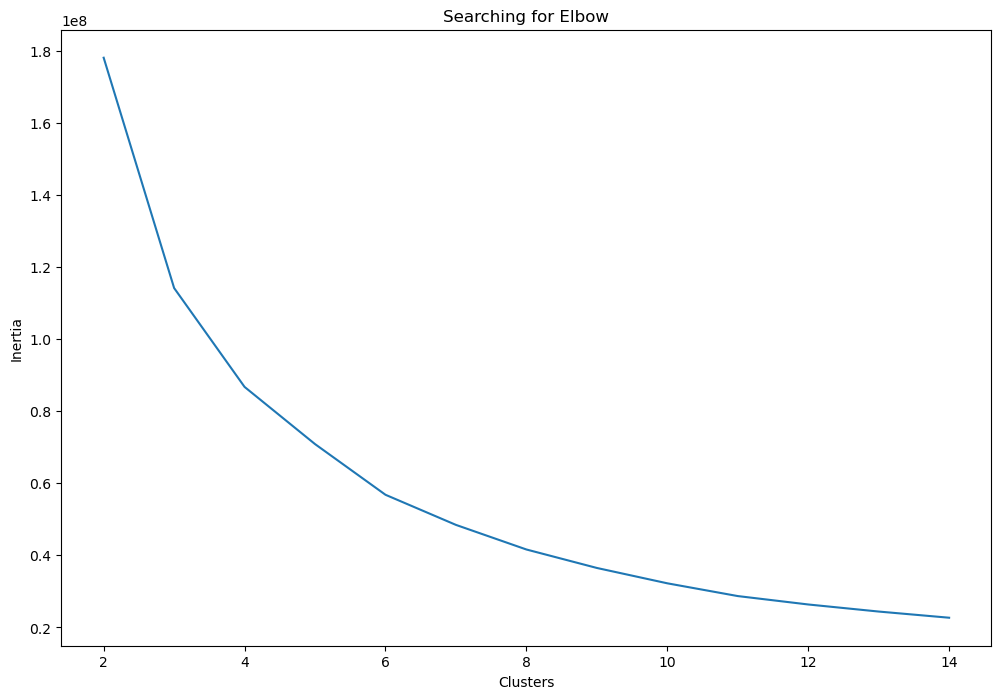

In [95]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(2, 15)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

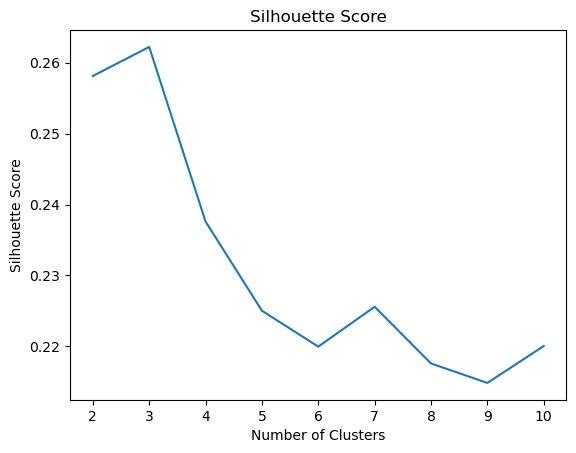

In [96]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [99]:
max_silhouette_score = max(silhouette_scores)
optimal_k = silhouette_scores.index(max_silhouette_score) + 2  # Adding 2 because the loop starts from 2
print("Optimal number of clusters (K) based on silhouette score:", optimal_k)

Optimal number of clusters (K) based on silhouette score: 3


C:\Users\micro\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


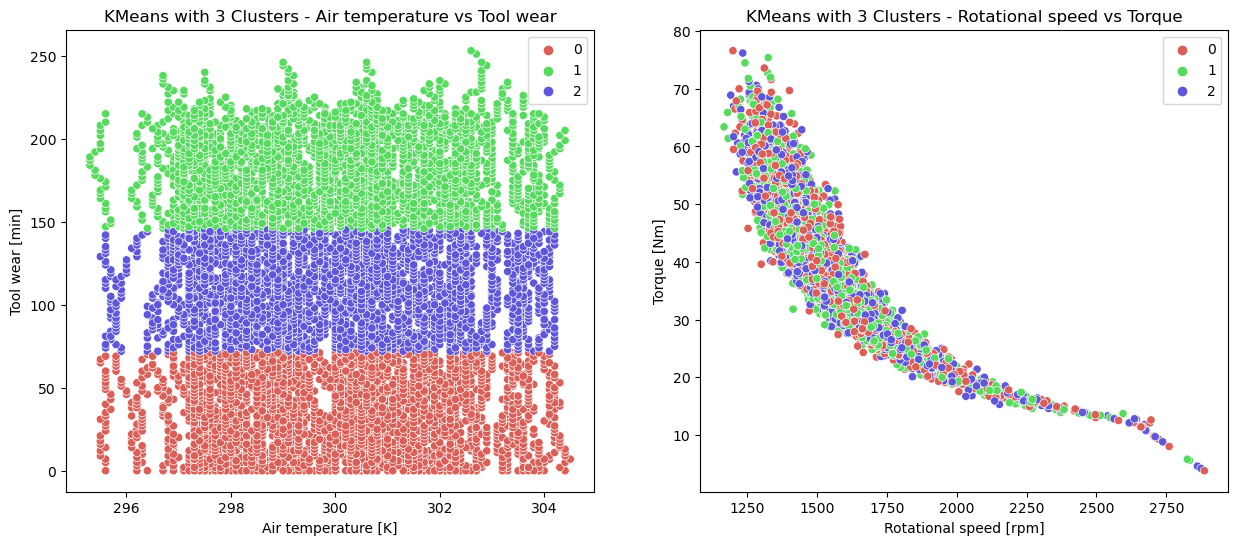

In [113]:
km3 = KMeans(n_clusters=3).fit(data_selected[['Air temperature [K]', 'Tool wear [min]']])

# Ajout des étiquettes de clusters à data_selected
data_selected['Labels'] = km3.labels_

# Création de la figure
fig = plt.figure(figsize=(15, 6))

# Sous-plot 1
ax1 = fig.add_subplot(121)
sns.scatterplot(x='Air temperature [K]', y='Tool wear [min]', hue='Labels', palette=sns.color_palette('hls', 3), data=data_selected, ax=ax1)
ax1.set_title('KMeans with 3 Clusters - Air temperature vs Tool wear')
ax1.legend(loc='upper right')

# Sous-plot 2
ax2 = fig.add_subplot(122)
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Labels', palette=sns.color_palette('hls', 3), data=data_selected, ax=ax2)
ax2.set_title('KMeans with 3 Clusters - Rotational speed vs Torque')
ax2.legend(loc='upper right')

plt.show()

In [112]:
data_selected.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Labels
0,298.1,308.6,1551,42.8,0,1
1,298.2,308.7,1408,46.3,3,1
2,298.1,308.5,1498,49.4,5,1
3,298.2,308.6,1433,39.5,7,1
4,298.2,308.7,1408,40.0,9,1


In [106]:
pip install scikit-learn-extra


  Obtaining dependency information for scikit-learn-extra from https://files.pythonhosted.org/packages/22/2f/86f58cb2bd3f81bdb28555470761c27c0d62a566329aac70e8507cb744fd/scikit_learn_extra-0.3.0-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/340.5 kB ? eta -:--:--
   --- ----------------------------------- 30.7/340.5 kB 262.6 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/340.5 kB 262.6 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/340.5 kB 262.6 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/340.5 kB 262.6 kB/s eta 0:00:02
   --------- ----------------------------- 81.9/340.5 kB 254.2 kB/s eta 0:00:02
   ---------------- --------------------- 143.4/340.5 kB 405.9 kB/s eta 0:00:01
   -

In [108]:
from sklearn_extra.cluster import KMedoids